In [2]:
%matplotlib inline
# Importing necessary libraries
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("label.csv")
df

,name of the file,digit label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
1792,1792,9
1793,1793,0
1794,1794,8
1795,1795,9


In [72]:
# B) Build the feature matrix and label vector: Each image is considered as a data sample with 
# pixels as features. Thus, to build the feature table you have to convert each 8x8 image into 
# an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with 64 
# feature columns.
for column in df[['digit label']]:
    labels = df[column]
    # values() returns a view object. The view object contains the values of the series, as a list
y = list(labels)
y

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 9,
 5,
 5,
 6,
 5,
 0,
 9,
 8,
 9,
 8,
 4,
 1,
 7,
 7,
 3,
 5,
 1,
 0,
 0,
 2,
 2,
 7,
 8,
 2,
 0,
 1,
 2,
 6,
 3,
 3,
 7,
 3,
 3,
 4,
 6,
 6,
 6,
 4,
 9,
 1,
 5,
 0,
 9,
 5,
 2,
 8,
 2,
 0,
 0,
 1,
 7,
 6,
 3,
 2,
 1,
 7,
 4,
 6,
 3,
 1,
 3,
 9,
 1,
 7,
 6,
 8,
 4,
 3,
 1,
 4,
 0,
 5,
 3,
 6,
 9,
 6,
 1,
 7,
 5,
 4,
 4,
 7,
 2,
 8,
 2,
 2,
 5,
 7,
 9,
 5,
 4,
 8,
 8,
 4,
 9,
 0,
 8,
 9,
 8,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 9,
 5,
 5,
 6,
 5,
 0,
 9,
 8,
 9,
 8,
 4,
 1,
 7,
 7,
 3,
 5,
 1,
 0,
 0,
 2,
 2,
 7,
 8,
 2,
 0,
 1,
 2,
 6,
 3,
 3,
 7,
 3,
 3,
 4,
 6,
 6,
 6,
 4,
 9,
 1,
 5,
 0,
 9,
 5,
 2,
 8,
 2,
 0,
 0,
 1,
 7,
 6,
 3,
 2,
 1,
 7,
 3,
 1,
 3,
 9,
 1,
 7,
 6,
 8,
 4,
 3,
 1,
 4,
 0,
 5,
 3,
 6,
 9,
 6,
 1,
 7,
 5,
 4,
 4,
 7,
 2,
 8,
 2,
 2,
 5,
 5,
 4,
 8,
 8,


In [73]:
for column in df[['name of the file']]:
    name_of_file = list(df[column])

X = []
for i in range(len(name_of_file)):
    directory = 'Digit/' + str(name_of_file[i]) + '.jpg'
    # Produces 2d 8x8 array
    image = mpimg.imread(directory)
    # A 2D array can be reshaped into a 1D array using .reshape(-1)
    image_array = image.reshape(-1)
    X.append(image_array)
X

[array([  0,   2,  88, 217, 158,  21,   0,   0,  16,   0, 228, 236, 166,
        253,  95,   0,   0,  41, 255,  44,  11, 182, 132,   3,  11,  80,
        220,   0,   2, 143, 133,   5,   6,  71, 122,   0,   5, 155, 140,
          0,   0,  76, 194,   0,  26, 207, 105,  15,   0,  18, 255,  83,
        146, 211,   4,   0,   4,   3,  87, 228, 182,   0,   9,   2],
       dtype=uint8),
 array([  0,   0,  11, 187, 210,  78,   5,   0,  13,   5,   0, 181, 252,
        136,   0,   2,   0,   1,  56, 232, 255, 104,   5,   3,   0, 118,
        244, 240, 255,  11,   8,   0,  18,   0,  11, 255, 242,  57,  12,
          0,   0,   3,  12, 248, 255,  77,   5,   0,   9,   2,  21, 255,
        255, 114,   0,   0,   0,   0,   0, 172, 251, 157,   0,  12],
       dtype=uint8),
 array([  0,   0,   5,  59, 240, 199,   2,   0,   5,   0,  35, 255, 231,
        201,  11,   0,   5,   0, 160, 191, 128, 255,   0,   0,   0,  11,
         15,  79, 250, 167,   0,  20,  12,  10, 126, 204, 242,  11,   5,
          0,   0,

In [74]:
# C) Use sklearn functions to split the dataset into testing and training sets with the following 
# parameters: test_size=0.1, random_state=2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [75]:
# D) Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing 
# datasets that you built in part (c).
# Use my_RandomForest.fit for training your random forest classifier and my_RandomForest.predict  
# for prediction. Test your Machine Learning Algorithm on testing set (from part(c)), and calculate and 
# report the accuracy.
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train, y_train)
y_predict = my_RandomForest.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print('Random Forest Classifier accuracy:', accuracy)

Random Forest Classifier accuracy: 0.9277777777777778


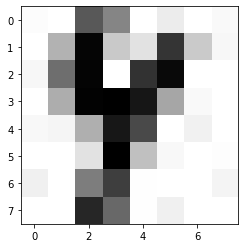

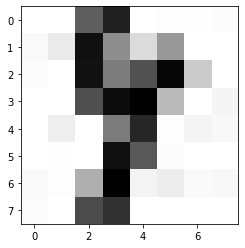

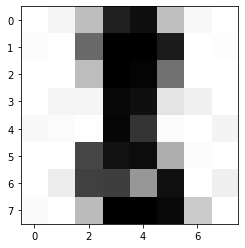

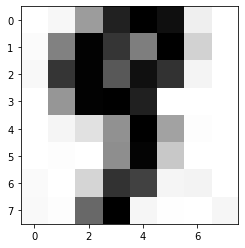

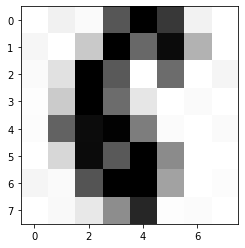

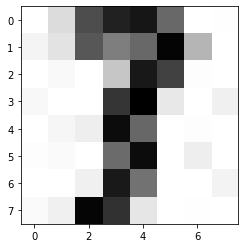

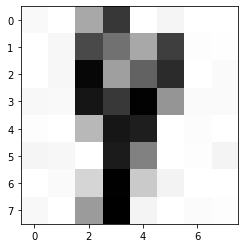

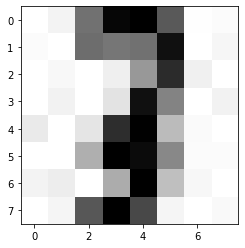

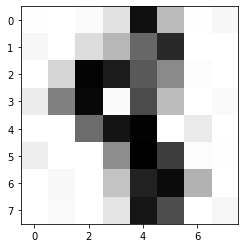

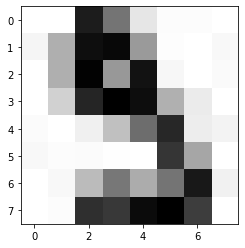

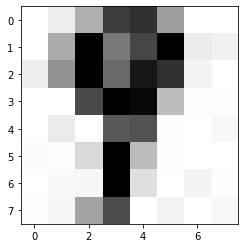

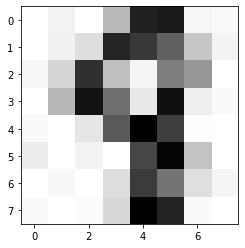

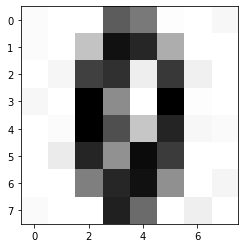

In [76]:
# E) Write some codes to find which one of the data samples (i.e. which images) have been misclassified 
# (classified incorrectly) in your testing set. Then, use the following command to show the misclassified images: 
# plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')

misclassified = np.where(y_test != y_predict)

missclassified_list = []
for i in range(len(misclassified)):
    missclassified_list = misclassified[i]
    
for i in missclassified_list:
    image = X_test[i].reshape(8,8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()